**Image classification using convolutional neural network**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from keras import datasets, layers

In [ ]:
(x_train, y_train), (x_test, y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 37s 0us/step


In [ ]:
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,5))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

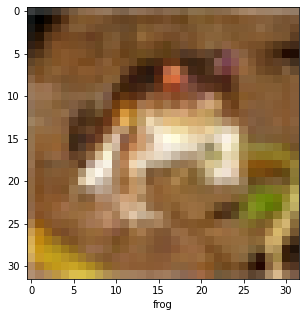

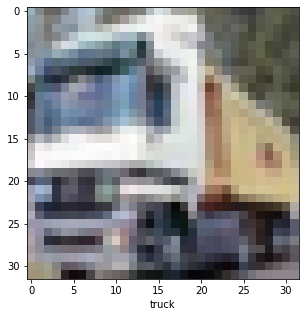

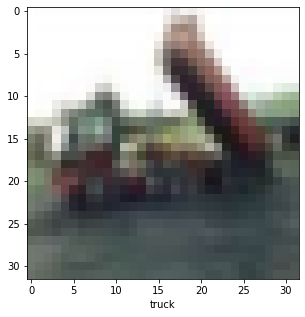

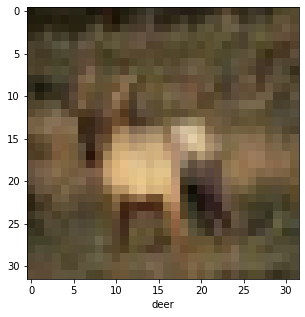

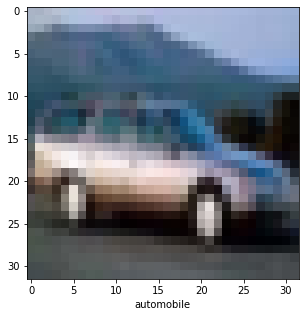

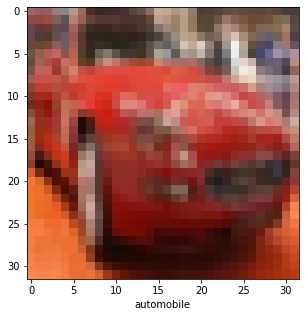

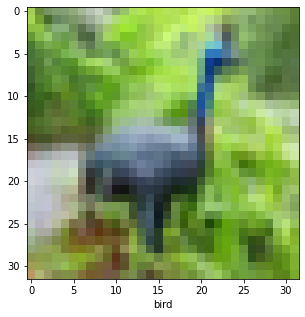

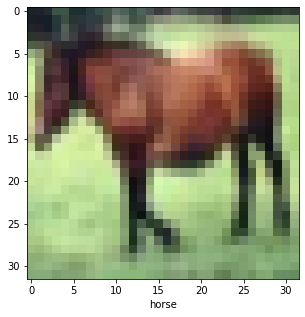

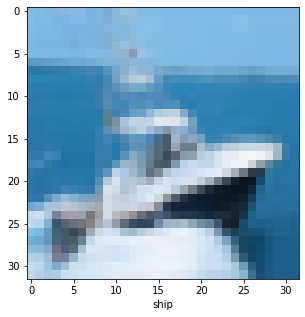

In [ ]:
for i in range(9):
  plot_sample(x_train,y_train,i)

In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0

Normalizing x

In [ ]:
x_train.shape

(50000, 32, 32, 3)

Building an ANN

In [ ]:
ann=keras.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])
ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

ann.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 1.8759 - accuracy: 0.3287
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6542 - accuracy: 0.4058
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5783 - accuracy: 0.4358
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5211 - accuracy: 0.4533
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4882 - accuracy: 0.4678
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4627 - accuracy: 0.4762
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4266 - accuracy: 0.4892
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4103 - accuracy: 0.4962
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3854 - accuracy: 0.4989
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.36

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
y_test[0]

3

In [ ]:
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(i) for i in y_pred]
print('Classification Report:\n',classification_report(y_test,y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.44      0.53      1000
           1       0.59      0.58      0.59      1000
           2       0.34      0.44      0.39      1000
           3       0.33      0.30      0.31      1000
           4       0.48      0.34      0.39      1000
           5       0.34      0.47      0.40      1000
           6       0.50      0.61      0.55      1000
           7       0.57      0.49      0.53      1000
           8       0.62      0.63      0.63      1000
           9       0.54      0.53      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



**BUILD A CNN**

In [ ]:
cnn_model=keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [ ]:
cnn_model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 11s 4ms/step - loss: 1.4598 - accuracy: 0.4776
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1084 - accuracy: 0.6108
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9717 - accuracy: 0.6613
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8905 - accuracy: 0.6899
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8259 - accuracy: 0.7137
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7742 - accuracy: 0.7303
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7231 - accuracy: 0.7487
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6847 - accuracy: 0.7599
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6443 - accuracy: 0.7741
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.61

In [ ]:
y_pred_cnn=cnn_model.predict(x_test)
y_pred_cnn_classes=[np.argmax(i) for i in y_pred_cnn]
print('Classification Report:\n',classification_report(y_test,y_pred_cnn_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74      1000
           1       0.84      0.79      0.82      1000
           2       0.59      0.59      0.59      1000
           3       0.51      0.47      0.49      1000
           4       0.75      0.57      0.65      1000
           5       0.52      0.70      0.59      1000
           6       0.74      0.80      0.77      1000
           7       0.75      0.75      0.75      1000
           8       0.83      0.80      0.81      1000
           9       0.82      0.74      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [ ]:
cnn_model1=keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3), padding='same', strides=(1,1)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', strides=(1,1)),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

cnn_model1.summary()

In [ ]:
cnn_model1.fit(x_train, y_train, epochs=10)

In [ ]:
y_pred_cnn1=cnn_model1.predict(x_test)
y_pred_cnn_classes1=[np.argmax(i) for i in y_pred_cnn1]
print('Classification Report:\n',classification_report(y_test,y_pred_cnn_classes1))